## <center> Leitura, limpeza e exploratory data analysis (EDA) dos dados </center>
Nesta etapa será realizada a leitura, limpeza e análise exploratória dos dados. Serão observados os tipos de dados presentes nos datasets, tratados valores faltantes, observada a presença de outliers bem como a distribuição dos dados nas diversas variáveis, a  fim de servir de se obter insights que sirvam de suporte para a fase de feature engineering.

### Importando as libraries necessárias

In [48]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
import seaborn as sns 

#from side_by_side import print_side_by_side
from IPython.core.interactiveshell import InteractiveShell
#‘all’, ‘last’, ‘last_expr’ or ‘none’, ‘last_expr_or_assign. Default 'last_expr'
InteractiveShell.ast_node_interactivity = "all"

### Leitura dos dados
Os datasets de treino e teste serão carregados diretamente do repositório no github onde está hospedado o projeto. Como é um repositório privado existe a necessidade de gerar o token para baixá-los.
Como os arquivos não possuem os nomes das variáveis vamos especificar o parâmetro **"header=None"**, como existem **espaços em branco antes e depois de alguns valores** vamos especificar o separador como **' *,*' para eliminar esses espaços**, além disto, será especificado que **strings '?'** devem ser **tratados como NaN**, pois é o que elas representam no dataset. O conjunto de **teste possui uma primeira linha estranha**, sendo assim, vamos desconsiderá-la especificando **skiprows=1** no carregamento deste dataset.

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race',
          'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', "income"]
           
df_train = pd.read_csv('https://raw.githubusercontent.com/mvpalheta/adult_census_income/main/adult_train.csv?token=AQESD6LQCTNEGQ563LKURUTA5L2OS',
                       header=None, sep=' *, *', na_values='?', names=columns, engine='python')

In [46]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
df_train.shape

(32561, 15)

In [5]:
df_test = pd.read_csv('https://raw.githubusercontent.com/mvpalheta/adult_census_income/main/adult_test.csv?token=AQESD6ONJ7DGVC27LTXAENLA5L2RU',
                       header=None, skiprows=1, sep=' *, *', na_values='?', names=columns, engine='python')

In [6]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
df_test.shape

(16281, 15)

### Informações sobre as variáveis das bases de treino e teste
Neste ponto, vamos avaliar algumas informações básicas dos datasets como o tipo de cada campo bem como a a presença de valores missing.

In [44]:
print('')
print("\033[1m" +'Informações sobre a base de treino'+ "\033[0m")
print('')
df_train.info()
print('')
print("\033[1m" +'Informações sobre a base de teste'+ "\033[0m")
print('')
df_test.info()


Informações sobre a base de treino

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Informações sobre a base de teste

<class 'pandas.core.

### Analisando a presença de colunas com missing

In [49]:
print('')
print("\033[1m" +'Missings na base de treino'+ "\033[0m")
print('')
df_train.isna().sum()
print('')
print("\033[1m" +'Missings na base de teste'+ "\033[0m")
print('')
df_test.isna().sum()


Missings na base de treino



age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


Missings na base de teste



age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Podemos notar que os **campos 'workclass', 'occupation' e 'native-country' possuem alguns valores missing**, como se tratam variáveis categóricas e uma vez que uma pequena quantidade de dados está faltando, a estratégia de tratamento será **imputá-los com o valor modal da base de treino** a fim de evitar perda de informação nos datasets.

### Imputando missings nas bases de treino e teste

In [10]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race',
          'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', "income"]
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_train_imp = pd.DataFrame(imp_mode.fit_transform(df_train), columns = df_train.columns)
df_train_imp[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = df_train_imp[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].apply(pd.to_numeric)
df_test_imp = pd.DataFrame(imp_mode.transform(df_test), columns = df_test.columns)
df_test_imp[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = df_test_imp[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].apply(pd.to_numeric)

In [11]:
print('')
print("\033[1m" +'Missings na base de treino'+ "\033[0m")
print('')
df_train_imp.shape
df_train_imp.isna().sum()
print('')
print("\033[1m" +'Missings na base de teste'+ "\033[0m")
print('')
df_test_imp.shape
df_test_imp.isna().sum()


Missings na base de treino



(32561, 15)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Missings na base de teste



(16281, 15)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
df_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Verificando se as variáveis categóricas apresentam algum valor fora do esperado
A seguir, vamos analisar se as variáveis categóricas tanto da base de treino quanto de teste apresentam algum valor diferente dos citados no dicionário do dataset

In [13]:
# Na base de treino
df_ = df_train_imp.select_dtypes(exclude=['int64'])
for col in df_.columns:
    print(df_[col].unique())
    print('')

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

['Male' 'Female']

['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuad

In [14]:
# Na base de teste
df_ = df_test_imp.select_dtypes(exclude=['int64'])
for col in df_.columns:
    print(df_[col].unique())
    print('')

['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']

['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

['Male' 'Female']

['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India

Como pode ser verificado acima, todos os valores das variáveis categóricas, nas duas bases, estão dentro do que foi especificado no arquivo de descrição dos dados. Assim, não se faz necessário alguma ação no sentido de ajuste dos dados.

### Verificando a presença de outliers
Aqui será analisado se as variáveis contínuas apresentam outliers, para decidir, em caso positivo, o que fazer a fim de amenizar este efeito. Esta, análise será realizada apenas na base de treino uma vez que é nossa base de experimento para desenvolver o modelo. O que for decidido após a análise no dataset de treino será aplicado ao dataset de teste.

In [15]:
InteractiveShell.ast_node_interactivity = "last_expr"

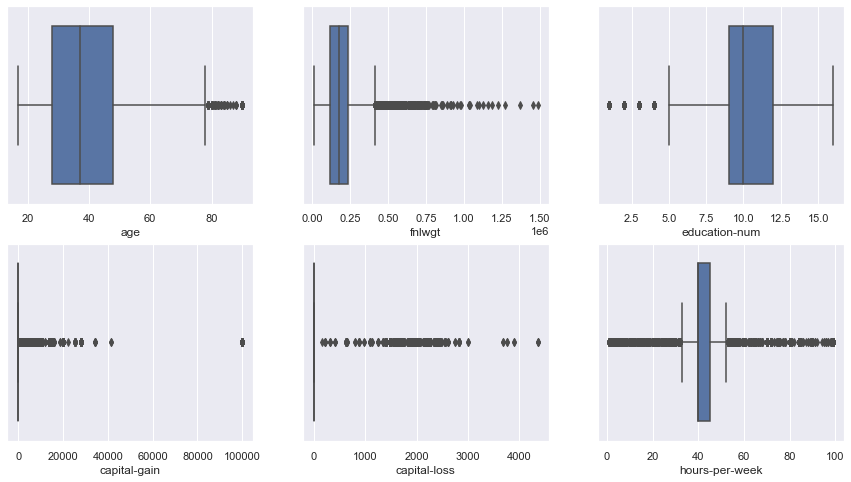

In [16]:
sns.set(rc={"figure.figsize": (15, 8)})

plt.subplot(2,3,1)
ax = sns.boxplot(x=df_train_imp['age'])

plt.subplot(2,3,2)
ax = sns.boxplot(x=df_train_imp['fnlwgt'])

plt.subplot(2,3,3)
ax = sns.boxplot(x=df_train_imp['education-num'])

plt.subplot(2,3,4)
ax = sns.boxplot(x=df_train_imp['capital-gain'])

plt.subplot(2,3,5)
ax = sns.boxplot(x=df_train_imp['capital-loss'])

plt.subplot(2,3,6)
ax = sns.boxplot(x=df_train_imp['hours-per-week'])

plt.show()

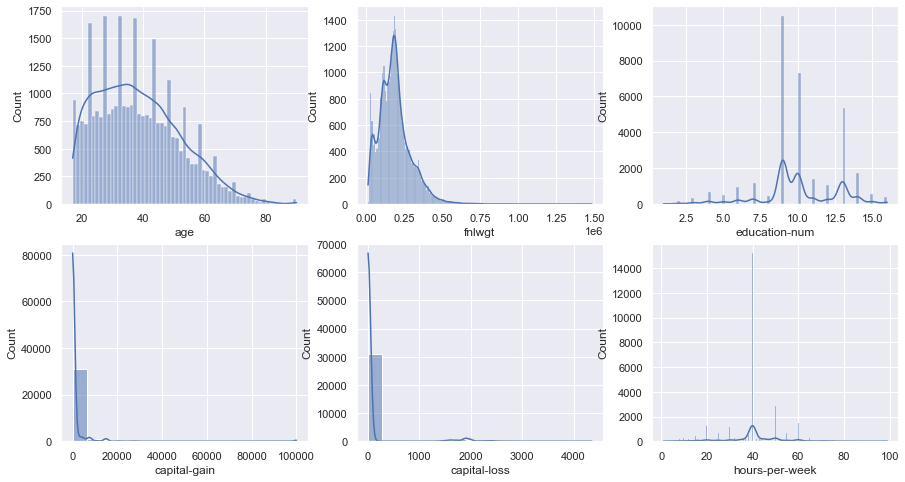

In [17]:
sns.set(rc={"figure.figsize": (15, 8)})

plt.subplot(2,3,1)
ax = sns.histplot(x=df_train_imp['age'], kde=True)

plt.subplot(2,3,2)
ax = sns.histplot(x=df_train_imp['fnlwgt'], kde=True)

plt.subplot(2,3,3)
ax = sns.histplot(x=df_train_imp['education-num'], kde=True)

plt.subplot(2,3,4)
ax = sns.histplot(x=df_train_imp['capital-gain'], kde=True)

plt.subplot(2,3,5)
ax = sns.histplot(x=df_train_imp['capital-loss'], kde=True)

plt.subplot(2,3,6)
ax = sns.histplot(x=df_train_imp['hours-per-week'], kde=True)

plt.show()

In [18]:
df_train_imp.describe(percentiles=[.25, .5, .75, .9, .95, .99]).round(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
90%,58.00,329054.00,13.00,0.00,0.00,55.00
95%,63.00,379682.00,14.00,5013.00,0.00,60.00
99%,74.00,510072.00,16.00,15024.00,1980.00,80.00


A partir dos resultados acima, se observa outlier em todas a features analisadas. As variáveis 'capital-gain' e 'capital-loss' apresentam ao menos 90% de observações iguais a zero, o que pode ser um insight para gerar outras features indicando se a pessoa possui ou não ganho e perdas de capital. Pode-se notar, também, que 50% das pessoas trabalham até 40 horas por semana e possuem até 37 anos de idade. As variáveis 'fnlwgt' e 'education-num' não fazem muito sentido de serem analisadas devido às suas naturezas. Por hora não vamos mexer com estes valores discrepantes e passaremos à fase de análise exploratória dos dados (EDA). Na fase de feature engineering iremos avaliar como tratar os outliers.

In [19]:
#InteractiveShell.ast_node_interactivity = "all"

## Análise exploratória dos dados
A análise exploratória também será desenvolvida em cima da base de treino pois representa nossos dados de estudo. Também utilizaremos as variáveis originais a fim de avaliar seu comportamento e obter insights para a fase de feature engineering.

### Distribuição da variável target

(0.0, 85.0)

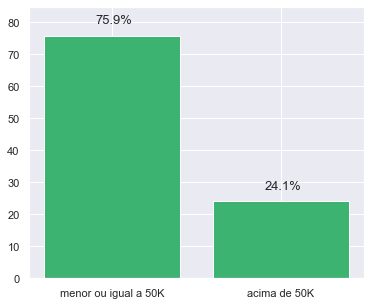

In [20]:
length_base = df_train_imp.shape[0]
c_menorigual_50k = df_train_imp[df_train_imp.income=='<=50K'].shape[0]
c_acima_50k = length_base - c_menorigual_50k

p_menorigual_50k = (c_menorigual_50k / length_base)*100
p_acima_50k = (c_acima_50k / length_base)*100

x = ["menor ou igual a 50K", "acima de 50K"]
height= [p_menorigual_50k, p_acima_50k]
height_1= [c_menorigual_50k, c_acima_50k]

plt.figure(figsize=(6,5))
plt.bar(x, height, color="mediumseagreen")
plt.text(0-.1,height[0]+(max(height)*0.05), str(round(100*height_1[0]/sum(height_1),1))+"%", fontsize=13)
plt.text(1-.1,height[1]+(max(height)*0.05), str(round((100*height_1[1]/sum(height_1)),1))+"%", fontsize=13)
plt.ylim(0,85)

A partir dos resultados acima, pode-se verificar que o percentual de pessoas ganhando acima de 50K anuais é um terço do percentual do outro grupo. Também, se nota um desbalanceamento nos dados mas que não é tão severo, de modo geral até algoritmos como regressão logística conseguem trabalhar bem com esse nível de desbalanceamento.

### Avaliando a distribuição da variável target nas variáveis categóricas
Abaixo será avaliado como ocorre a distribuição das pessoas que ganham acima e abaixo de 50K anuais de acordo com cada variável categórica (*workclass, education, marital-status, occupation, relationship, race, sex, native-country*) a fim de se obter insights para as fases de feature engineering e treinamento de algoritmos.

In [56]:
def graph_dist (df, variavel):
    #plt.figure(figsize=(12,6))
    #order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
    sns.countplot(x=df[variavel], hue = df['income'], palette='Greens_r', 
                  order = df[variavel].value_counts().index)
    plt.title('Distribuição da variável alvo por '+variavel, fontweight='bold')#, fontsize=18
    plt.xticks(rotation = 90)#fontsize=16,
    plt.yticks()#fontsize=16
    plt.legend()#fontsize=16

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

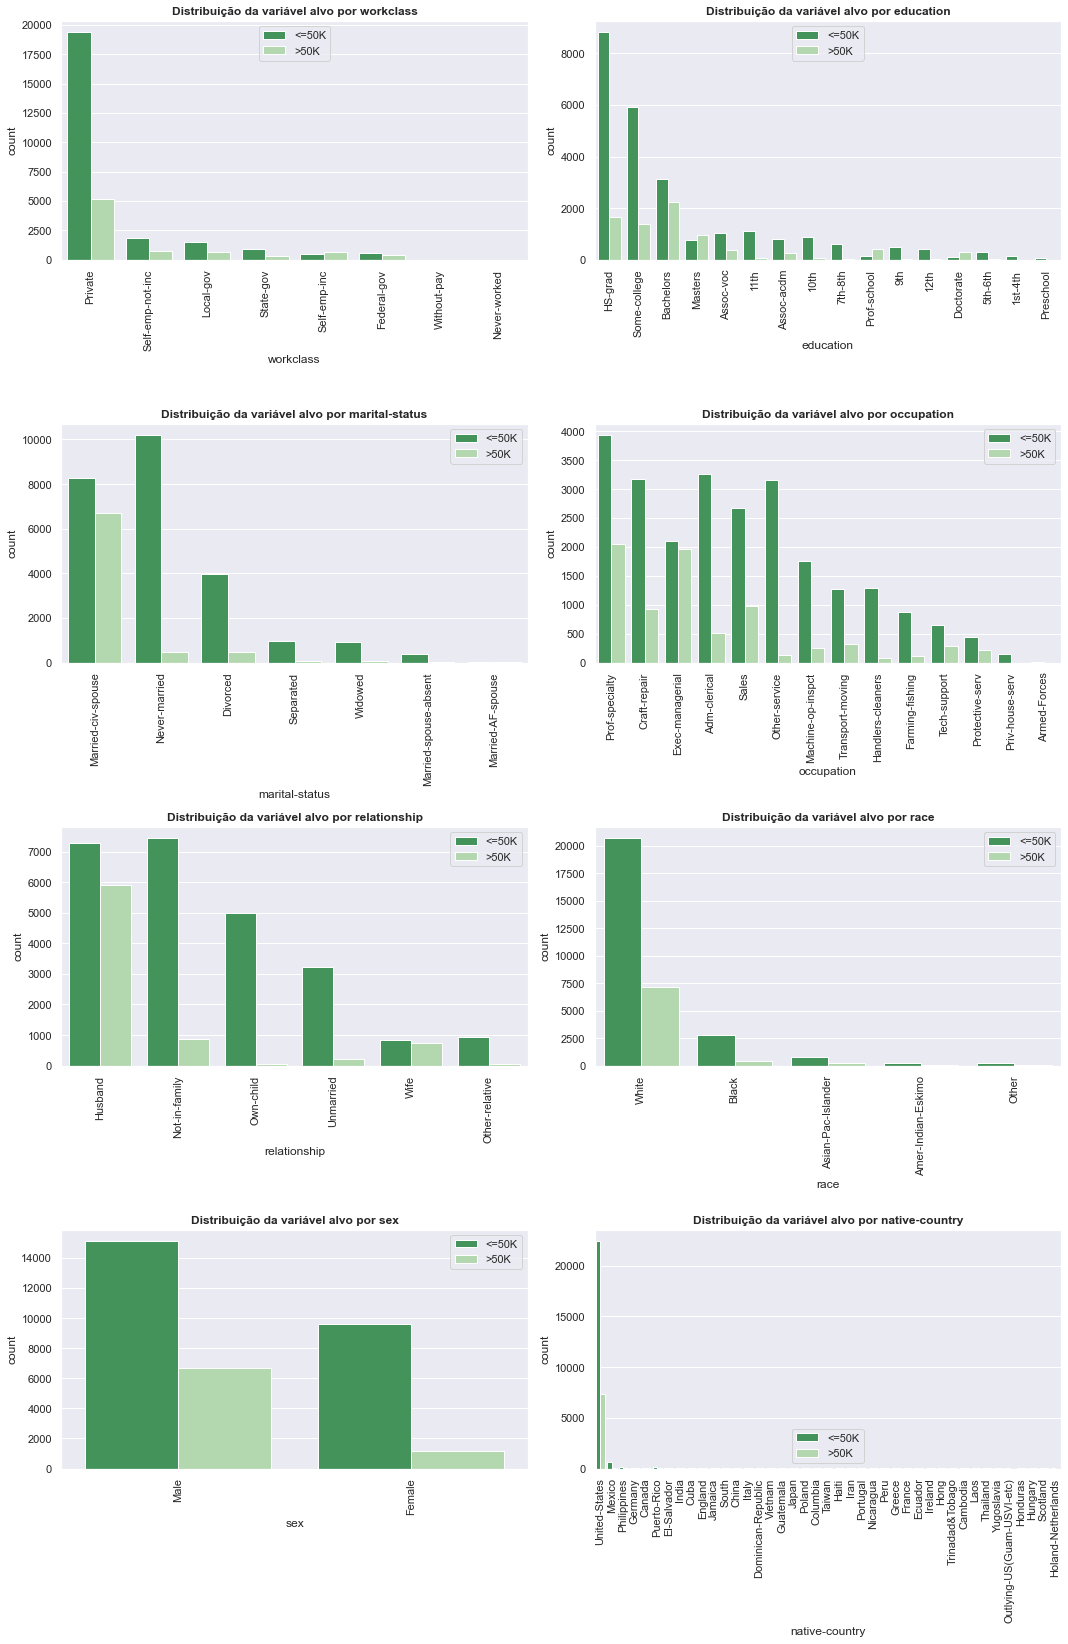

In [57]:
sns.set(rc={"figure.figsize": (15, 23)})

plt.subplot(4,2,1)
graph_dist (df_train_imp, 'workclass')

plt.subplot(4,2,2)
graph_dist (df_train_imp, 'education')

plt.subplot(4,2,3)
graph_dist (df_train_imp, 'marital-status')

plt.subplot(4,2,4)
graph_dist (df_train_imp, 'occupation')

plt.subplot(4,2,5)
graph_dist (df_train_imp, 'relationship')

plt.subplot(4,2,6)
graph_dist (df_train_imp, 'race')

plt.subplot(4,2,7)
graph_dist (df_train_imp, 'sex')

plt.subplot(4,2,8)
graph_dist (df_train_imp, 'native-country')

plt.tight_layout()
plt.show()

A partir dos resultados acima pode-se notar que a maioria das pessoas trabalha no setor privado, o qual tb apresenta uma grande discrepância de pagamentos, com a grande maioria das pessoas nesse setor ganhando menos de 50K por ano. Self-Employed é a única categoria onde o número de pessoas ganhando acima de 50K supera as que ganham abaixo. Pessoas nas categorias Without-Pay e Never-Worked apresentam poucos dados na base.

Em relação ao nível educacional percebe-se que Bachelors, Masters, Doctorate, Prof-school são as categorias que possuem mais pessoas ganhando acima de 50K ao ano em relação ao grupo que ganha abaixo desse valor. Bachelors é a categoria que apresenta a menor diferença entre as quantidade de pessoa que ganham acima e abaixo de 50K anuais.
A partir do status de matrimônio, verifica-se que a maioria das pessoas se enquadra na categoria Married-civ-spouse, a qual, também, é a que apresentam menor divergência entre a quantidade em cada categoria da variável alvo. Nas outras categorias a diferença é bastante acentuada.

Em relação à ocupação, nota-se que na categoria Exec-managerial é quase equivalente a quantidade de pessoas que ganham acima e abaixo de 50K anuais, ou seja, pessoas nessa categoria têm grandes possibilidades de ganhar 50K por ano. Por outro lado, pessoas nas categorias Other-service, Handlers-cleaners e Farming-fishing têm uma possibilidade bem menor de ter renda acima de 50K por ano.

No que tange ao status de relacionamento, percebe-se que a maioria das pessoas se enquadra na categoria husband, talvez esteja relacionado ao fato de a maioria dos respondentes na base de dados serem do sexo masculino. Pessoas nessa categoria possuem boas chances de ganhar acima de 50K ao ano. As esposas têm praticamente a mesma probabilidade conseguir uma renda superior a 50K por ano.

Nota-se, também, que as pessoas brancas são a grande maioria na base de dados, com bem poucas pessoas em outras categorias de raça. O mesmo ocorre com a feature native-country.
Em relação ao sexo, verifica-se que a maioria das pessoas é do sexo masculino e que o fato de fazer parte dessa categoria aumenta a chance de possuir renda superior a 50K anuais.

### Avaliando a distribuição das variáveis contínuas de acordo com as pessoas que ganham acima e abaixo de 50K
Abaixo será avaliado como ocorre a distribuição de cada variável contínua (*age, capital-gain, capital-loss, hours-per-week*) de acordo com cada categoria da variável target, a fim de se obter insights para as fases de feature engineering e treinamento de algoritmos. As features fnlwgt e education-num não serão incluídas nesta análise, pois a primeira é um tipo de peso de cada observação e a última é apenas o código de cada categoria educacional que já foram analisadas acima.

In [23]:
#import matplotlib
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

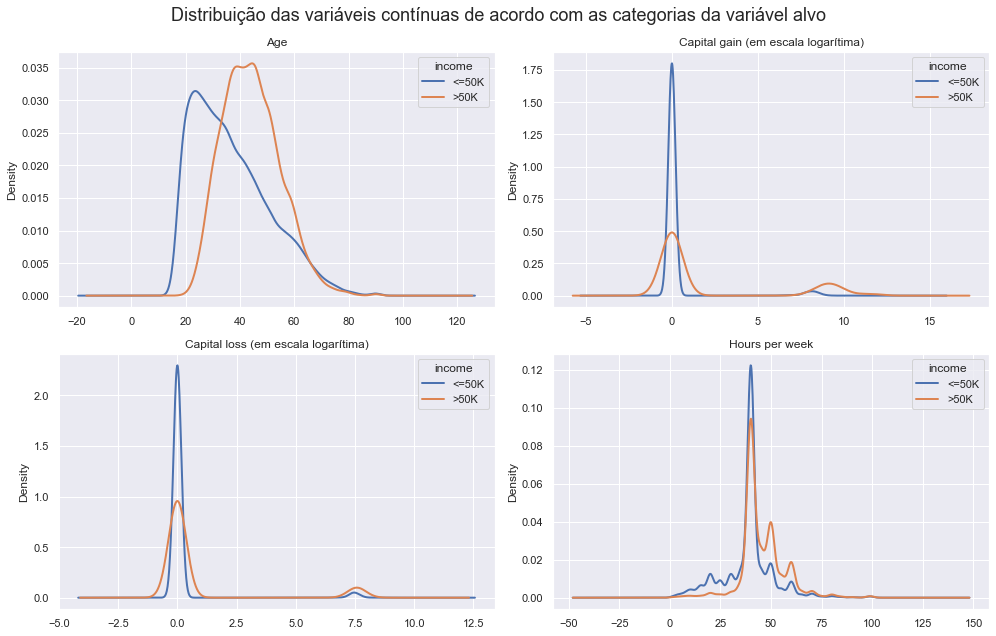

In [24]:
data_wide1 = df_train_imp.pivot(columns='income', values='age')
data_wide2 = df_train_imp.pivot(columns='income', values='capital-gain')
data_wide2['<=50K'] = np.log(1 + data_wide2['<=50K'])
data_wide2['>50K'] = np.log(1 + data_wide2['>50K'])
data_wide3 = df_train_imp.pivot(columns='income', values='capital-loss')
data_wide3['<=50K'] = np.log(1 + data_wide3['<=50K'])
data_wide3['>50K'] = np.log(1 + data_wide3['>50K'])
data_wide4 = df_train_imp.pivot(columns='income', values='hours-per-week')

sns.set(rc={"figure.figsize": (14, 9)})

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle("Distribuição das variáveis contínuas de acordo com as categorias da variável alvo", fontsize=18)


data_wide1.plot.density(linewidth = 2, ax=axes[0, 0])
axes[0, 0].set_title("Age")

data_wide2.plot.density(linewidth = 2, ax=axes[0, 1])
axes[0, 1].set_title("Capital gain (em escala logarítima)")

data_wide3.plot.density(linewidth = 2, ax=axes[1, 0])
axes[1, 0].set_title("Capital loss (em escala logarítima)")

data_wide4.plot.density(linewidth = 2, ax=axes[1, 1])
axes[1, 1].set_title("Hours per week")

plt.tight_layout()
plt.show()

In [25]:
InteractiveShell.ast_node_interactivity = "all"

In [26]:
age = df_train_imp.groupby('income')['age'].describe(percentiles=[.25, .5, .75, .9, .95, .99]).round(2).transpose()
cg = df_train_imp.groupby('income')['capital-gain'].describe(percentiles=[.25, .5, .75, .9, .95, .99]).round(2).transpose()
cl = df_train_imp.groupby('income')['capital-loss'].describe(percentiles=[.25, .5, .75, .9, .95, .99]).round(2).transpose()
hpw = df_train_imp.groupby('income')['hours-per-week'].describe(percentiles=[.25, .5, .75, .9, .95, .99]).round(2).transpose()

In [41]:
from IPython.display import display, HTML
def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption).set_table_styles([{
                    'selector': 'caption',
                    'props': [
                        ('color', 'red'),
                        ('font-size', '14px')
                    ]
                }])._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [42]:
display_side_by_side([age, cg, cl, hpw], ['Age', 'Capital gain', 'Capital loss', 'Hours per week'])

income,<=50K,>50K
count,24720.000000,7841.000000
mean,36.780000,44.250000
std,14.020000,10.520000
min,17.000000,19.000000
25%,25.000000,36.000000
50%,34.000000,44.000000
75%,46.000000,51.000000
90%,57.000000,59.000000
95%,63.000000,62.000000
99%,74.000000,71.000000


A partir destes resultados, se nota que parece existir uma diferença de idade entre as categorias da variável alvo, onde as pessoas que ganham acima de 50K por ano são um pouco mais velhas que o outro grupo. Em relação a capital gain e capital loss existem uma forte concentração em torno do valor zero embora entre as pessoas com mais de 50K exista um pouco mais de casos com mais capital gain e capital loss, ou seja, existe um leve indicativo de que o fato de a pessoa possuir capital gain pode aumentar a probabilidade da mesma obter renda superios a 50k por ano. No relativo às horas trabalhadas por semana, a diferenciação também parece ser muito baixa.

In [29]:
InteractiveShell.ast_node_interactivity = "last_expr"

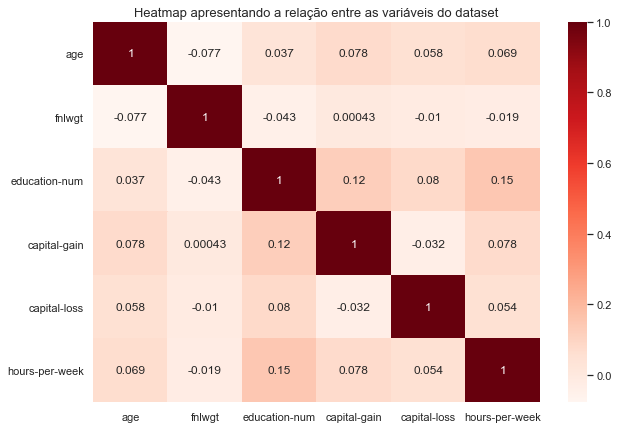

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(df_train_imp.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap apresentando a relação entre as variáveis do dataset', fontsize=13)
plt.show()

A partir do gráfico de correlação acima, se nota que não parece haver correlação alta entre as variáveis preditoras contínuas

In [31]:
df_train_imp.to_csv("df_train_cleaned.csv", index=False)
df_test_imp.to_csv("df_test_cleaned.csv", index=False)